In [117]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from pprint import pprint

In [108]:
cleanedData = pd.read_csv('../Fully-Cleaned-Data.csv')

In [109]:
categoricalColumns = cleanedData.select_dtypes(include=['object']).columns.tolist()
numericalData = cleanedData.drop(columns=categoricalColumns)
oneHotData = pd.get_dummies(cleanedData[categoricalColumns])

In [110]:
cleanedDataOneHotEncoded = pd.concat([numericalData, oneHotData], axis=1)
print(cleanedDataOneHotEncoded.shape)

(2047, 48)


In [111]:
import warnings
warnings.filterwarnings('ignore')

treeClassifier = tree.DecisionTreeClassifier(max_depth=5, class_weight='balanced')

indicator = cleanedDataOneHotEncoded['Future Relapse Binary']
X = cleanedDataOneHotEncoded.drop(['Future Relapse Binary'], axis=1)
XTrain, XTest, yTrain, yTest = train_test_split(X, indicator)
treeModel = treeClassifier.fit(XTrain, yTrain)

testPredictions = pd.DataFrame(treeModel.predict(XTest))
print('True Class Breakdown')
print(yTest.value_counts())
print('Predicted Class Breakdown')
print(testPredictions.value_counts())



True Class Breakdown
Future Relapse Binary
0    321
1    191
Name: count, dtype: int64
Predicted Class Breakdown
0
0    325
1    187
Name: count, dtype: int64


In [112]:
scores = cross_val_score(treeClassifier, XTrain, yTrain, cv=10, verbose=3)
print(scores)

[CV] END ................................ score: (test=0.558) total time=   0.0s
[CV] END ................................ score: (test=0.578) total time=   0.0s
[CV] END ................................ score: (test=0.656) total time=   0.0s
[CV] END ................................ score: (test=0.571) total time=   0.0s
[CV] END ................................ score: (test=0.565) total time=   0.0s
[CV] END ................................ score: (test=0.621) total time=   0.0s
[CV] END ................................ score: (test=0.641) total time=   0.0s
[CV] END ................................ score: (test=0.588) total time=   0.0s
[CV] END ................................ score: (test=0.536) total time=   0.0s
[CV] END ................................ score: (test=0.582) total time=   0.0s
[0.55844156 0.57792208 0.65584416 0.57142857 0.56493506 0.62091503
 0.64052288 0.58823529 0.53594771 0.58169935]


In [120]:
CVscores = cross_validate(treeClassifier, XTrain, yTrain, cv=10)
print(CVscores['test_score'])

[0.57792208 0.58441558 0.67532468 0.59090909 0.58441558 0.59477124
 0.61437908 0.60130719 0.54248366 0.56862745]


In [113]:
testAcc = metrics.accuracy_score(yTest, testPredictions)
testBalancedAccScore = metrics.balanced_accuracy_score(yTest, testPredictions)
testPrecScore = metrics.precision_score(yTest, testPredictions)
print(testAcc)
print(testBalancedAccScore)
print(testPrecScore)

testCM = confusion_matrix(yTest, testPredictions)
print(testCM)

testCR = classification_report(yTest, testPredictions)
print(testCR)

0.5703125
0.5385819836570925
0.42245989304812837
[[213 108]
 [112  79]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       321
           1       0.42      0.41      0.42       191

    accuracy                           0.57       512
   macro avg       0.54      0.54      0.54       512
weighted avg       0.57      0.57      0.57       512



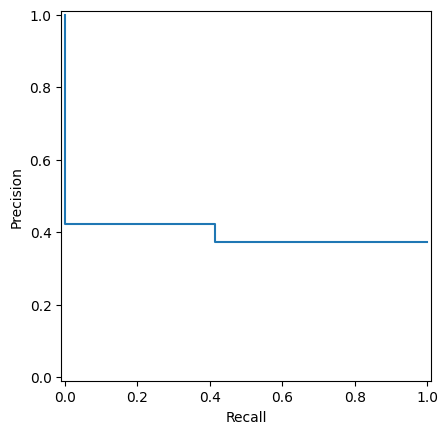

In [114]:
precision, recall, _ = precision_recall_curve(yTest, testPredictions)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

In [115]:
accScore = metrics.accuracy_score(yTest, testPredictions)
balancedAccScore = metrics.balanced_accuracy_score(yTest, testPredictions)
precScore = metrics.precision_score(yTest, testPredictions)
recScore = metrics.recall_score(yTest, testPredictions)
yeet = metrics.f1_score(yTest, testPredictions)
### add auc score (??)
print(accScore)
print(balancedAccScore)
print(precScore)
print(recScore)
print(yeet)

cm = confusion_matrix(yTest, testPredictions)
print(cm)

cr = classification_report(yTest, testPredictions)
print(cr)

0.5703125
0.5385819836570925
0.42245989304812837
0.41361256544502617
0.41798941798941797
[[213 108]
 [112  79]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       321
           1       0.42      0.41      0.42       191

    accuracy                           0.57       512
   macro avg       0.54      0.54      0.54       512
weighted avg       0.57      0.57      0.57       512

